In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **DATA WRANGLING**

### Gathering Data

**MEMUAT TABEL**

In [ ]:
data_df = pd.read_csv("https://raw.githubusercontent.com/gitagpds/dataset_fix/refs/heads/main/gym%20and%20diet%20recommendation1.csv")
data_df.head()

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Diet
0,1,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, and Lettuc..."
1,2,Male,18,1.68,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Tomatoes, Garlic, leafy greens, b..."
2,3,Male,18,1.68,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers and..."
3,4,Male,18,1.68,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr..."
4,5,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, Lettuce); ..."


### Assessing Data

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14589 entries, 0 to 14588
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            14589 non-null  int64  
 1   Sex           14589 non-null  object 
 2   Age           14589 non-null  int64  
 3   Height        14589 non-null  float64
 4   Weight        14589 non-null  float64
 5   Hypertension  14589 non-null  object 
 6   Diabetes      14589 non-null  object 
 7   BMI           14589 non-null  float64
 8   Level         14589 non-null  object 
 9   Fitness Goal  14589 non-null  object 
 10  Fitness Type  14589 non-null  object 
 11  Exercises     14589 non-null  object 
 12  Diet          14589 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.4+ MB


Tidak ada masalah mengenai tipe data pada masing-masing kolom yang ada. Jumlah seluruh data dan jumlah data masing-masing kolom juga sesuai, jadi tidak ada missing value.

In [ ]:
data_df.isna().sum()

,0
ID,0
Sex,0
Age,0
Height,0
Weight,0
Hypertension,0
Diabetes,0
BMI,0
Level,0
Fitness Goal,0


In [ ]:
# Menampilkan jumlah baris duplikat
print("Jumlah duplikasi: ", data_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data.

In [ ]:
# Menampilkan statistik deskriptif untuk data numerik
data_df.describe()

,ID,Age,Height,Weight,BMI
count,14589.000000,14589.000000,14589.000000,14589.000000,14589.000000
mean,7295.000000,39.554870,1.699851,70.505991,24.417569
std,4211.625874,13.192655,0.098129,20.030635,6.765144
min,1.000000,18.000000,1.300000,32.000000,9.520000
25%,3648.000000,28.000000,1.640000,55.000000,18.940000
50%,7295.000000,39.000000,1.680000,70.000000,25.250000
75%,10942.000000,51.000000,1.770000,86.000000,29.320000
max,14589.000000,63.000000,2.030000,130.000000,70.000000


- Height (tinggi) dalam satuan meter

In [ ]:
print(data_df.shape)

(14589, 13)


Terdapat 14.589 baris dan 13 kolom

**Distribusi nilai unik pada kolom kategorikal**

In [ ]:
for col in ['Sex', 'Hypertension', 'Diabetes', 'Level', 'Fitness Goal', 'Fitness Type', 'Exercises', 'Diet']:
    print(f"\n", data_df[col].value_counts())


 Sex
Male      9374
Female    5215
Name: count, dtype: int64

 Hypertension
No     7838
Yes    6751
Name: count, dtype: int64

 Diabetes
No     7838
Yes    6751
Name: count, dtype: int64

 Level
Overweight     4142
Normal         3650
Obuse          3439
Underweight    3358
Name: count, dtype: int64

 Fitness Goal
Weight Loss    7581
Weight Gain    7008
Name: count, dtype: int64

 Fitness Type
Cardio Fitness      7581
Muscular Fitness    7008
Name: count, dtype: int64

 Exercises
Brisk walking, cycling, swimming, running , or dancing.         4206
Squats, deadlifts, bench presses, and overhead presses          3632
Squats, yoga, deadlifts, bench presses, and overhead presses    3376
Walking, Yoga, Swimming.                                        1688
brisk walking, cycling, swimming, or dancing.                   1687
Name: count, dtype: int64

 Diet
Vegetables: (Garlic, Mushroom, Green Papper, Icebetg Lettuce); Protein Intake: (Baru Nuts, Beech Nuts, Hemp Seeds, Cheese Spandwich); Ju

**KESIMPULAN ASSESSING DATA**

1. Tipe Data : Tidak ada kesalahan tipe data.
2. Missing Value : Tidak ada missing value.
3. Duplicate Data : Tidak ada duplikasi data.
4. Inaccurate value : Tidak ada keanehan nilai.
5. Input yang diinginkan adalah Sex, Age, Height, Wight, Hypertension, Diabetes
6. Output yang diinginkan adalah Exercises dan Diet
7. Terdapat nilai 'Diet' pada kolom 'Diet' yang tidak berisi nilai makanan sehat seperti Vegetables, Protein Intake, dan Juice.

### Cleaning Data

Akan dilakukan cleaning data dengan menghapus kolom yang tidak dibutuhkan dan nilai yang tidak sesuai di kolom 'Diet'

In [ ]:
# Menghapus kolom BMI, Level, Fitness Goal, dan Fitness Type
columns_to_drop = ['BMI', 'Level', 'Fitness Goal', 'Fitness Type']
data_df = data_df.drop(columns=columns_to_drop)

# Memeriksa DataFrame setelah kolom dihapus
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14589 entries, 0 to 14588
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            14589 non-null  int64  
 1   Sex           14589 non-null  object 
 2   Age           14589 non-null  int64  
 3   Height        14589 non-null  float64
 4   Weight        14589 non-null  float64
 5   Hypertension  14589 non-null  object 
 6   Diabetes      14589 non-null  object 
 7   Exercises     14589 non-null  object 
 8   Diet          14589 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.0+ MB
None


In [ ]:
# Menghapus baris dengan nilai 'Diet' pada kolom 'Diet'
data_df = data_df[data_df['Diet'] != 'Diet']

# Memeriksa hasil setelah penghapusan
print(data_df['Diet'].value_counts())

Diet
Vegetables: (Garlic, Mushroom, Green Papper, Icebetg Lettuce); Protein Intake: (Baru Nuts, Beech Nuts, Hemp Seeds, Cheese Spandwich); Juice: (Apple Juice, Mango juice,and Beetroot juice)                                                                      5038
Vegetables: (Broccoli, Carrots, Spinach, Lettuce, Onion); Protein Intake: (Cheese, Cattoge cheese, Skim Milk, Law fat Milk, and Baru Nuts); Juice: (Fruit Juice, Aloe vera juice, Cold-pressed juice, and Watermelon juice)                                     2507
Vegetables: (Garlic, Roma Tomatoes, Capers, Green Papper, and Iceberg Lettuce); Protein Intake: (Cheese Sandwich, Baru Nuts, Beech Nuts, Squash Seeds, Mixed Teff, peanut butter, and jelly sandwich); Juice: (Apple juice, beetroot juice, and mango juice)    1688
Vegetables: (Mixed greens, cherry tomatoes, cucumbers, bell peppers, carrots, celery, bell peppers);Protein Intake: (Chicken, fish, tofu, or legumes); Juice : (Green juice,kale, spinach, cucumber, celery, and app

In [ ]:
# Memeriksa DataFrame setelah nilai 'Diet' pada kolom 'Diet' dihapus
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14553 entries, 0 to 14588
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            14553 non-null  int64  
 1   Sex           14553 non-null  object 
 2   Age           14553 non-null  int64  
 3   Height        14553 non-null  float64
 4   Weight        14553 non-null  float64
 5   Hypertension  14553 non-null  object 
 6   Diabetes      14553 non-null  object 
 7   Exercises     14553 non-null  object 
 8   Diet          14553 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.1+ MB
None


In [ ]:
print(data_df.shape)

(14553, 9)


Setelah dilakukan cleaning data, datanya berubah menjadi 14.553 data dengan 9 kolom

In [ ]:
# Menyimpan hasil cleaning ke file lokal
data_df.to_csv('gym_and_diet_recommendation_cleaned_data.csv', index=False)

## **EXPLORATORY DATA ANALYSIS (EDA)**

**MEMUAT TABEL BARU**

In [ ]:
data_df = pd.read_csv("https://raw.githubusercontent.com/gitagpds/dataset_fix/refs/heads/main/gym_and_diet_recommendation_cleaned_data.csv")
data_df.head()

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,Exercises,Diet
0,1,Male,18,1.68,47.5,No,No,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, and Lettuc..."
1,2,Male,18,1.68,47.5,Yes,No,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Tomatoes, Garlic, leafy greens, b..."
2,3,Male,18,1.68,47.5,No,Yes,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers and..."
3,4,Male,18,1.68,47.5,Yes,Yes,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr..."
4,5,Male,18,1.68,47.5,No,No,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, Lettuce); ..."


In [ ]:
# Menampilkan ringkasan statistik untuk semua kolom di dataframe 'data_df', termasuk statistik deskriptif untuk kolom numerik dan kategorikal
data_df.describe(include="all")

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,Exercises,Diet
count,14553.000000,14553,14553.000000,14553.000000,14553.000000,14553,14553,14553,14553
unique,NaN,2,NaN,NaN,NaN,2,2,5,10
top,NaN,Male,NaN,NaN,NaN,No,No,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Garlic, Mushroom, Green Papper, I..."
freq,NaN,9350,NaN,NaN,NaN,7820,7820,4206,5038
mean,7293.878307,NaN,39.515220,1.699786,70.547550,NaN,NaN,NaN,NaN
std,4212.960335,NaN,13.183613,0.098188,20.032687,NaN,NaN,NaN,NaN
min,1.000000,NaN,18.000000,1.300000,32.000000,NaN,NaN,NaN,NaN
25%,3651.000000,NaN,28.000000,1.640000,55.000000,NaN,NaN,NaN,NaN
50%,7289.000000,NaN,39.000000,1.680000,70.000000,NaN,NaN,NaN,NaN
75%,10939.000000,NaN,51.000000,1.770000,86.000000,NaN,NaN,NaN,NaN


In [ ]:
value_counts = data_df['Age'].value_counts().sort_index()
print(value_counts)

Age
18    368
19    296
20    333
21    298
22    286
23    290
24    442
25    378
26    362
27    363
28    401
29    363
30    354
31    362
32    385
33    363
34    354
35    330
36    290
37    290
38    282
39    282
40    337
41    273
42    273
43    336
44    274
45    305
46    305
47    305
48    305
49    305
50    302
51    302
52    294
53    294
54    294
55    294
56    294
57    294
58    294
59    294
60    294
61    295
62    325
63    193
Name: count, dtype: int64


In [ ]:
value_counts = data_df['Height'].value_counts().sort_index()
print(value_counts)

Height
1.30      32
1.40      32
1.44      32
1.48      32
1.49      32
1.50      96
1.51     160
1.52      64
1.53      96
1.54      64
1.55     129
1.56     192
1.57     288
1.58     288
1.59     192
1.60     245
1.61     313
1.62     958
1.63     382
1.64     514
1.65     562
1.66     563
1.67     626
1.68    2025
1.69     406
1.70     517
1.71     102
1.72     385
1.73     329
1.74     392
1.75     351
1.76     298
1.77     362
1.78     384
1.79     321
1.80     285
1.81     186
1.82     346
1.83     282
1.84     282
1.85     218
1.86     218
1.87     186
1.88     502
1.89      90
1.90      90
1.91      54
1.92       7
1.93      33
1.94       1
1.95       1
1.96       1
1.97       1
1.98       1
1.99       1
2.00       1
2.01       1
2.02       1
2.03       1
Name: count, dtype: int64


In [ ]:
value_counts = data_df['Weight'].value_counts().sort_index()
print(value_counts)

Weight
32.0      16
33.0      16
34.0     192
34.5       8
35.0      16
        ... 
126.0      8
127.0      8
128.0     16
129.0      8
130.0      8
Name: count, Length: 216, dtype: int64


**Distribusi nilai unik pada kolom kategorikal**

In [ ]:
for col in ['Sex', 'Hypertension', 'Diabetes', 'Exercises', 'Diet']:
    print(f"\n", data_df[col].value_counts())


 Sex
Male      9350
Female    5203
Name: count, dtype: int64

 Hypertension
No     7820
Yes    6733
Name: count, dtype: int64

 Diabetes
No     7820
Yes    6733
Name: count, dtype: int64

 Exercises
Brisk walking, cycling, swimming, running , or dancing.         4206
Squats, deadlifts, bench presses, and overhead presses          3614
Squats, yoga, deadlifts, bench presses, and overhead presses    3358
Walking, Yoga, Swimming.                                        1688
brisk walking, cycling, swimming, or dancing.                   1687
Name: count, dtype: int64

 Diet
Vegetables: (Garlic, Mushroom, Green Papper, Icebetg Lettuce); Protein Intake: (Baru Nuts, Beech Nuts, Hemp Seeds, Cheese Spandwich); Juice: (Apple Juice, Mango juice,and Beetroot juice)                                                                      5038
Vegetables: (Broccoli, Carrots, Spinach, Lettuce, Onion); Protein Intake: (Cheese, Cattoge cheese, Skim Milk, Law fat Milk, and Baru Nuts); Juice: (Fruit Juice, 

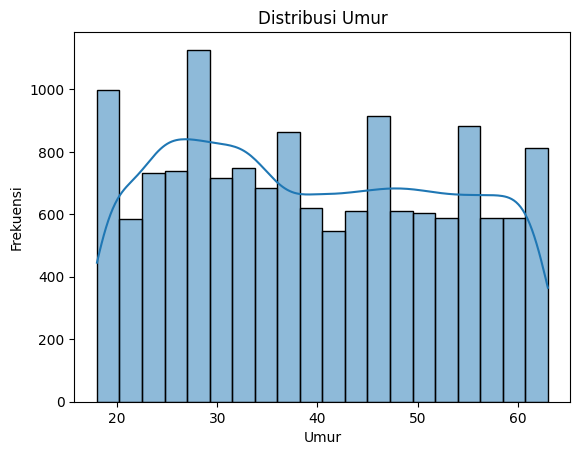

In [ ]:
sns.histplot(data_df['Age'], kde=True, bins=20)
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

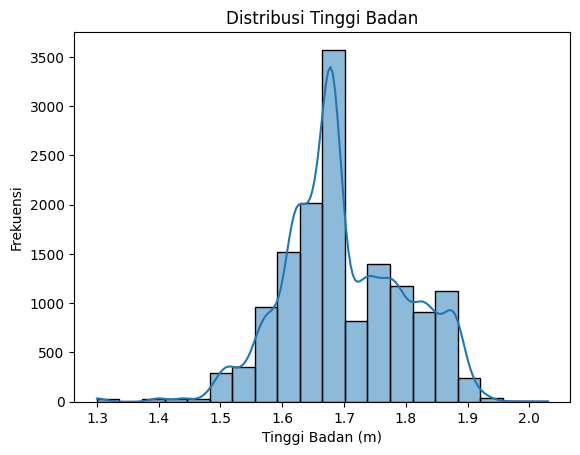

In [ ]:
sns.histplot(data_df['Height'], kde=True, bins=20)
plt.title('Distribusi Tinggi Badan')
plt.xlabel('Tinggi Badan (m)')
plt.ylabel('Frekuensi')
plt.show()

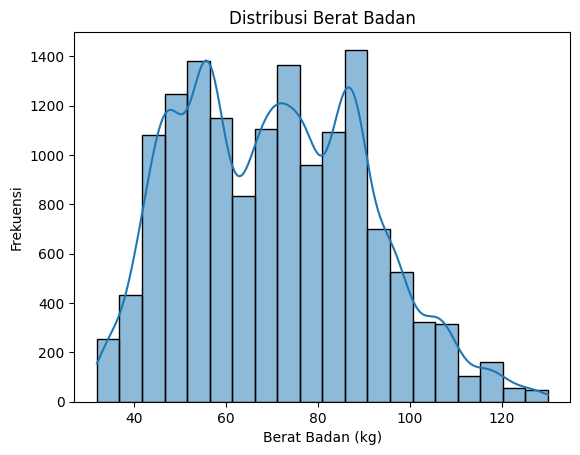

In [ ]:
sns.histplot(data_df['Weight'], kde=True, bins=20)
plt.title('Distribusi Berat Badan')
plt.xlabel('Berat Badan (kg)')
plt.ylabel('Frekuensi')
plt.show()

              ID       Age    Height    Weight
ID      1.000000  0.113840  0.127697  0.137493
Age     0.113840  1.000000  0.038943  0.002208
Height  0.127697  0.038943  1.000000  0.295242
Weight  0.137493  0.002208  0.295242  1.000000


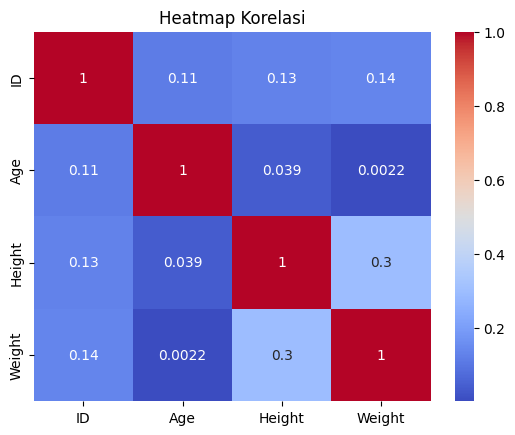

In [ ]:
# Filter hanya kolom numerik
numeric_columns = data_df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Tampilkan matriks korelasi
print(correlation_matrix)

# Visualisasi heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

### 1. **Hubungan Antar Variabel**

- **ID**:
  - Korelasi rendah dengan semua variabel lain (**Age: 0.11, Height: 0.13, Weight: 0.14**).
    - Ini menunjukkan bahwa kolom ID tidak berkaitan secara linier dengan variabel lainnya. Hal ini wajar karena ID biasanya hanya digunakan sebagai identifier dan bukan fitur yang bermakna secara numerik.

- **Age**:
  - Korelasi lemah atau hampir tidak ada dengan variabel lain (**Height: 0.04, Weight: -0.00**).
    - Tidak ada hubungan linier yang signifikan antara umur dan tinggi badan atau berat badan.

- **Height (Tinggi Badan)**:
  - Korelasi positif moderat dengan **Weight** (**0.29**).
    - Orang yang lebih tinggi cenderung memiliki berat badan lebih besar, tetapi hubungan ini tidak terlalu kuat.

---

### 2. **Analisis Hubungan Penting**  
- **Hubungan Height dan Weight**:
  - Nilai korelasi **0.29** menunjukkan hubungan yang moderat.
  - Orang yang lebih tinggi cenderung memiliki berat badan lebih besar, meskipun ada banyak faktor lain yang memengaruhi berat badan.

---

### 3. **Hubungan yang Tidak Signifikan**
- **Age dengan variabel lainnya**:
  - Korelasi rendah antara **Age** dan variabel lainnya (semua mendekati 0).
  - Ini menunjukkan bahwa umur tidak memengaruhi tinggi badan, berat badan, atau BMI secara linier dalam dataset ini.

---

### 4. **Kesimpulan Umum**
- **Height dan Weight** memiliki hubungan moderat (**0.29**), tetapi cukup signifikan.
- Variabel **Age** tidak memiliki korelasi yang signifikan dengan variabel lainnya.
- **ID** hanyalah identifier tanpa hubungan bermakna dengan fitur lain dalam dataset.

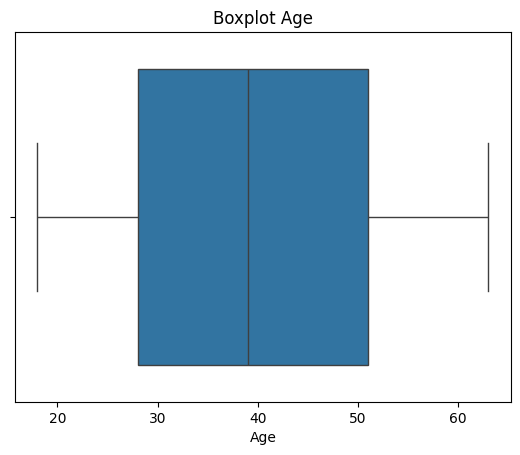

In [ ]:
sns.boxplot(x=data_df['Age'])
plt.title('Boxplot Age')
plt.show()

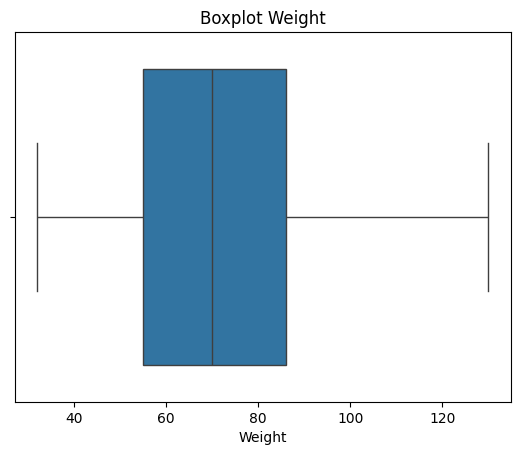

In [ ]:
sns.boxplot(x=data_df['Weight'])
plt.title('Boxplot Weight')
plt.show()

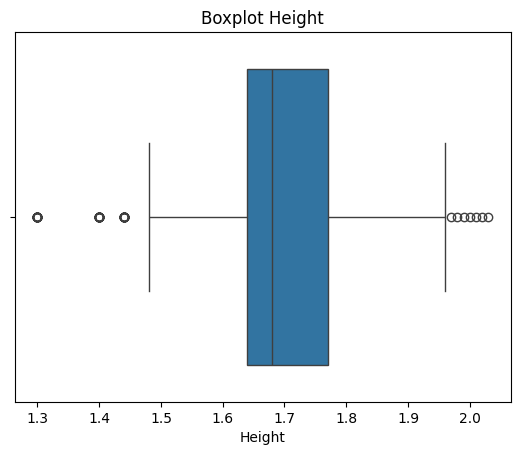

In [ ]:
sns.boxplot(x=data_df['Height'])
plt.title('Boxplot Height')
plt.show()